In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
sns.set(style='white')

# LOAD FUNCTIONS
%run useful_functions.ipynb

In [2]:
def am_dataprep(df_, att_name, levels, no=True):
    cols = [att_name] + levels + ['RFD-sumw']
    df_am = df_[cols].copy().sort_values('RFD-sumw')
    df_am = df_am.dropna()
    df_am.pop('RFD-sumw')

    att_ = df_am[att_name].unique()
    if att_name == 'ERFDbllp':
        values = ['Neighborhoods outside the city Barcelona', 'NC']
        for value in values:
            j, = np.where(att_ == value) 
            att_ = np.delete(att_,j )

    mtrx = []
    for att in att_:
        row = []
        for lev in levels:
            df_temp = df_am.loc[df_am[att_name]==att][lev].value_counts(normalize=True)*100
            if no:
                val = df_temp['No']
            else:
                val = df_temp['Yes']
            row.append(val)
        mtrx.append(row)
    return(mtrx, att_)

In [3]:
def sat_plot(mtrx,lev_, att_,fig_tup=(5,10), col = 'whitesmoke'):    
    fig, ax = plt.subplots(figsize=fig_tup)
    im = ax.imshow(mtrx, cmap='Purples')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(lev_)))
    ax.set_yticks(np.arange(len(att_)))

    # ... and label them with the respective list entries
    ax.set_xticklabels(lev_, rotation = 45, ha= "left")
    ax.set_yticklabels(att_)

    # Add grid
    ax.set_xticks(np.arange(len(lev_))-.5, minor=True)
    ax.set_yticks(np.arange(len(lev_))-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, left=True,
                labeltop=True, labelbottom=False, labelsize=14, pad=6)

    # Despine
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
        

    # Loop over data dimensions and create text annotations.
    for i in range(len(att_)):
        for j in range(len(lev_)):
            text = ax.text(j, i, round(mtrx[i][j],1),
                    ha="center", va="center", color=col, fontsize=16, fontweight='bold')
    
    # plt.title("Limitted access to materials", fontsize=22, y=1.2, fontweight='bold')
    
    # plt.rcParams['figure.dpi'] = 400
    # plt.savefig('dc_fam-r.png', bbox_inches='tight')

    fig.tight_layout()
    plt.show()

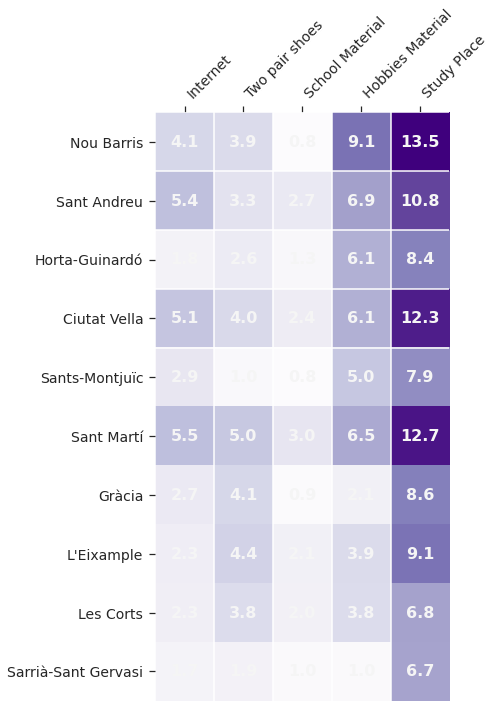

In [4]:
df_= df_t.copy()
att_name = 'Nom_Districte_Educatiu'
levels = ['bm_internet', 'bm_sabates', 'bm_mescola', 'bm_maficions', 'll_estudi']
lev_new= ['Internet', 'Two pair shoes', 'School Material', 'Hobbies Material', 'Study Place']

m, att = am_dataprep(df_, att_name, levels)
sat_plot(m,lev_new, att, fig_tup=(8,10))

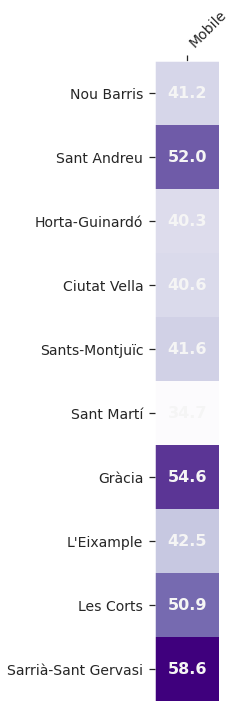

In [5]:
att_name = 'Nom_Districte_Educatiu'
levels = ['bm_mobil']
lev_new= ['Mobile']
# 
m, att = am_dataprep(df_, att_name, levels, no=True)
sat_plot(m,lev_new, att, fig_tup=(8,10))

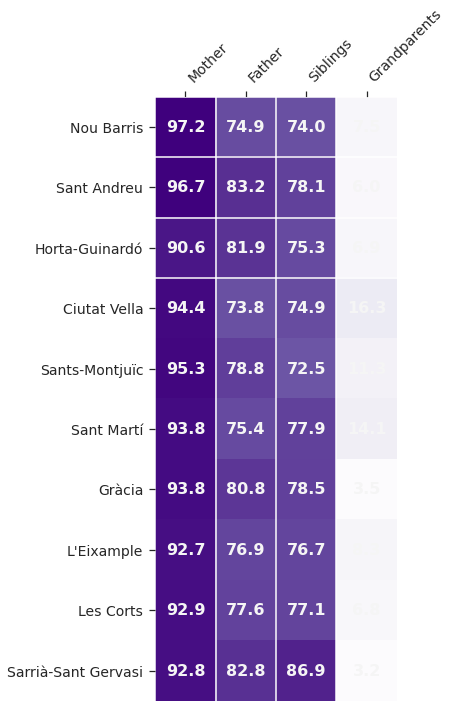

In [6]:
att_name = 'Nom_Districte_Educatiu'
levels = ['mare', 'pare', 'germans', 'avis']
lev_new= ['Mother', 'Father', 'Siblings', 'Grandparents']
# 
m, att = am_dataprep(df_, att_name, levels, no=False)
sat_plot(m,lev_new, att, fig_tup=(8,10))

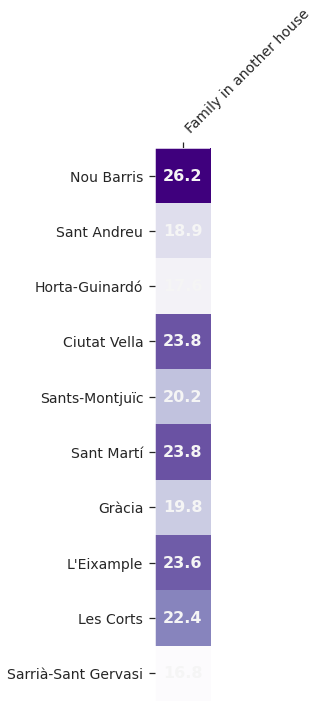

In [7]:
att_name = 'Nom_Districte_Educatiu'
levels = ['familia_altra_casa']
lev_new= ['Family in another house']
# 
m, att = am_dataprep(df_, att_name, levels, no=False)
sat_plot(m,lev_new, att, fig_tup=(8,10))

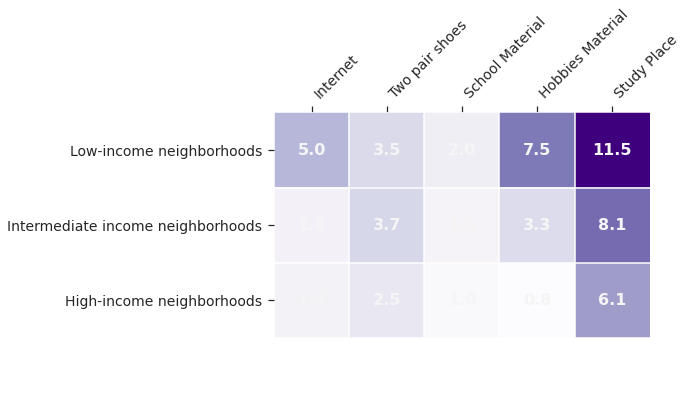

In [8]:
df_ = df_t.copy()
att_name = 'ERFDbllp'
levels = ['bm_internet', 'bm_sabates', 'bm_mescola', 'bm_maficions', 'll_estudi']
lev_new= ['Internet', 'Two pair shoes', 'School Material', 'Hobbies Material', 'Study Place']
m, att = am_dataprep(df_, att_name, levels)
sat_plot(m,lev_new, att, fig_tup=(10,6))

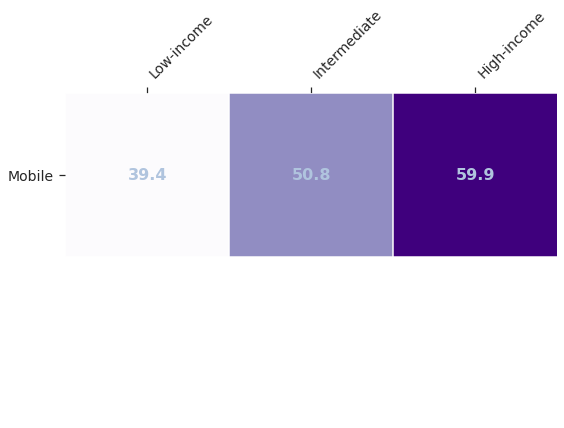

In [9]:
att_name = 'ERFDbllp'
levels = ['bm_mobil']
lev_new= ['Mobile']
# 
m, att = am_dataprep(df_, att_name, levels)
att_new= ['Low-income', 'Intermediate', 'High-income']
sat_plot(np.transpose(m),att_new, lev_new, fig_tup=(8,10), col='lightsteelblue')

In [10]:
df_t

,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio,Població,RFD-mean,RFD-sumw,RFD-std,RFD-sem
0,1,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,5 or 6 days a week,One day a month,1 or 2 days a week,Yes,Yes,166805,51.446154,55.011607,7.426261,2.059674
1,2,8,Nou Barris,6è,Boy,Yes,Intermediate income neighborhoods,11,I live with my family,Yes,...,3 or 4 days a week,1 or 2 days a week,1 or 2 days a week,Yes,I'm not sure,166805,51.446154,55.011607,7.426261,2.059674
2,3,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,1 or 2 days a week,Every day,I'm not sure,Yes,166805,51.446154,55.011607,7.426261,2.059674
3,4,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,Every day,1 or 2 days a week,3 or 4 days a week,Yes,Yes,166805,51.446154,55.011607,7.426261,2.059674
4,5,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,1 or 2 days a week,One day a month,Never or almost never,Yes,Yes,166805,51.446154,55.011607,7.426261,2.059674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,3958,4,Les Corts,6è,Girl,Yes,Intermediate income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,Never or almost never,One day a month,Yes,Yes,82201,161.000000,137.294018,76.092312,43.931917
3958,3959,4,Les Corts,6è,Boy,Yes,Low-income neighborhoods,11,I live with my family,No,...,One day a month,1 or 2 days a week,3 or 4 days a week,Yes,Yes,82201,161.000000,137.294018,76.092312,43.931917
3959,3960,3,Sants-Montjuïc,6è,Boy,Yes,Low-income neighborhoods,12,I live with my family,No,...,Every day,5 or 6 days a week,One day a month,No,Yes,182354,79.050000,84.592545,18.687352,6.606977
3960,3961,3,Sants-Montjuïc,5è,Girl,Yes,Low-income neighborhoods,10,I live with my family,No,...,5 or 6 days a week,3 or 4 days a week,One day a month,Yes,I'm not sure,182354,79.050000,84.592545,18.687352,6.606977


In [21]:
# -------------------------------

def bat_plot2(mtrx,lev_, att_, sec_mtrx, sec_lev, cmap, fig_tup=(5,10)):    
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=fig_tup, sharey=True, gridspec_kw={'width_ratios': [3.28, 1]})
    im1 = axes[0].imshow(mtrx, cmap=cmap)
    im2 = axes[1].imshow(sec_mtrx, cmap=cmap)

    # We want to show all ticks...
    axes[0].set_xticks(np.arange(len(lev_)))
    axes[0].set_yticks(np.arange(len(att_)))

    axes[1].set_xticks(np.arange(len(sec_lev)))
    # axes[1].set_yticks([])

    # ... and label them with the respective list entries
    axes[0].set_xticklabels(lev_, rotation = 45, ha= "left")
    axes[0].set_yticklabels(att_)

    axes[1].set_xticklabels(sec_lev, rotation = 45, ha= "left")

    # Add grid
    axes[0].set_xticks(np.arange(len(lev_))-.5, minor=True)
    axes[0].set_yticks(np.arange(len(lev_))-.5, minor=True)
    axes[1].set_xticks(np.arange(len(sec_lev))-.5, minor=True)

    # Let the horizontal axes labeling appear on top.
    axes[0].tick_params(top=True, bottom=False, left=True,
                labeltop=True, labelbottom=False, labelsize=14, pad=6)

    axes[1].tick_params(top=True, bottom=False, left=False,
                labeltop=True, labelbottom=False, labelsize=14, pad=6)

    
    # Loop over data dimensions and create text annotations.
    for i in range(len(att_)):
        for j in range(len(lev_)):
            text = axes[0].text(j, i, round(mtrx[i][j],1),
                        ha="center", va="center", color="w", fontsize=16, fontweight='bold')

    # Loop over data dimensions and create text annotations.
    for i2 in range(len(att_)):
        for j2 in range(len(sec_lev)):
            text = axes[1].text(j2, i2, round(sec_mtrx[i2][j2],1),
                        ha="center", va="center", color="w", fontsize=16, fontweight='bold')

    for ax in axes:
        # Despine
        for edge, spine in ax.spines.items():
            spine.set_visible(False)
        
        ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", bottom=False, left=False)
    
    # plt.title("Limitted access to materials", fontsize=22, y=1.3, x=-1)

    plt.rcParams['figure.dpi'] = 400
    plt.savefig('dc_fam-ff.png', bbox_inches='tight', transparent=True)
    fig.tight_layout()
    plt.show()

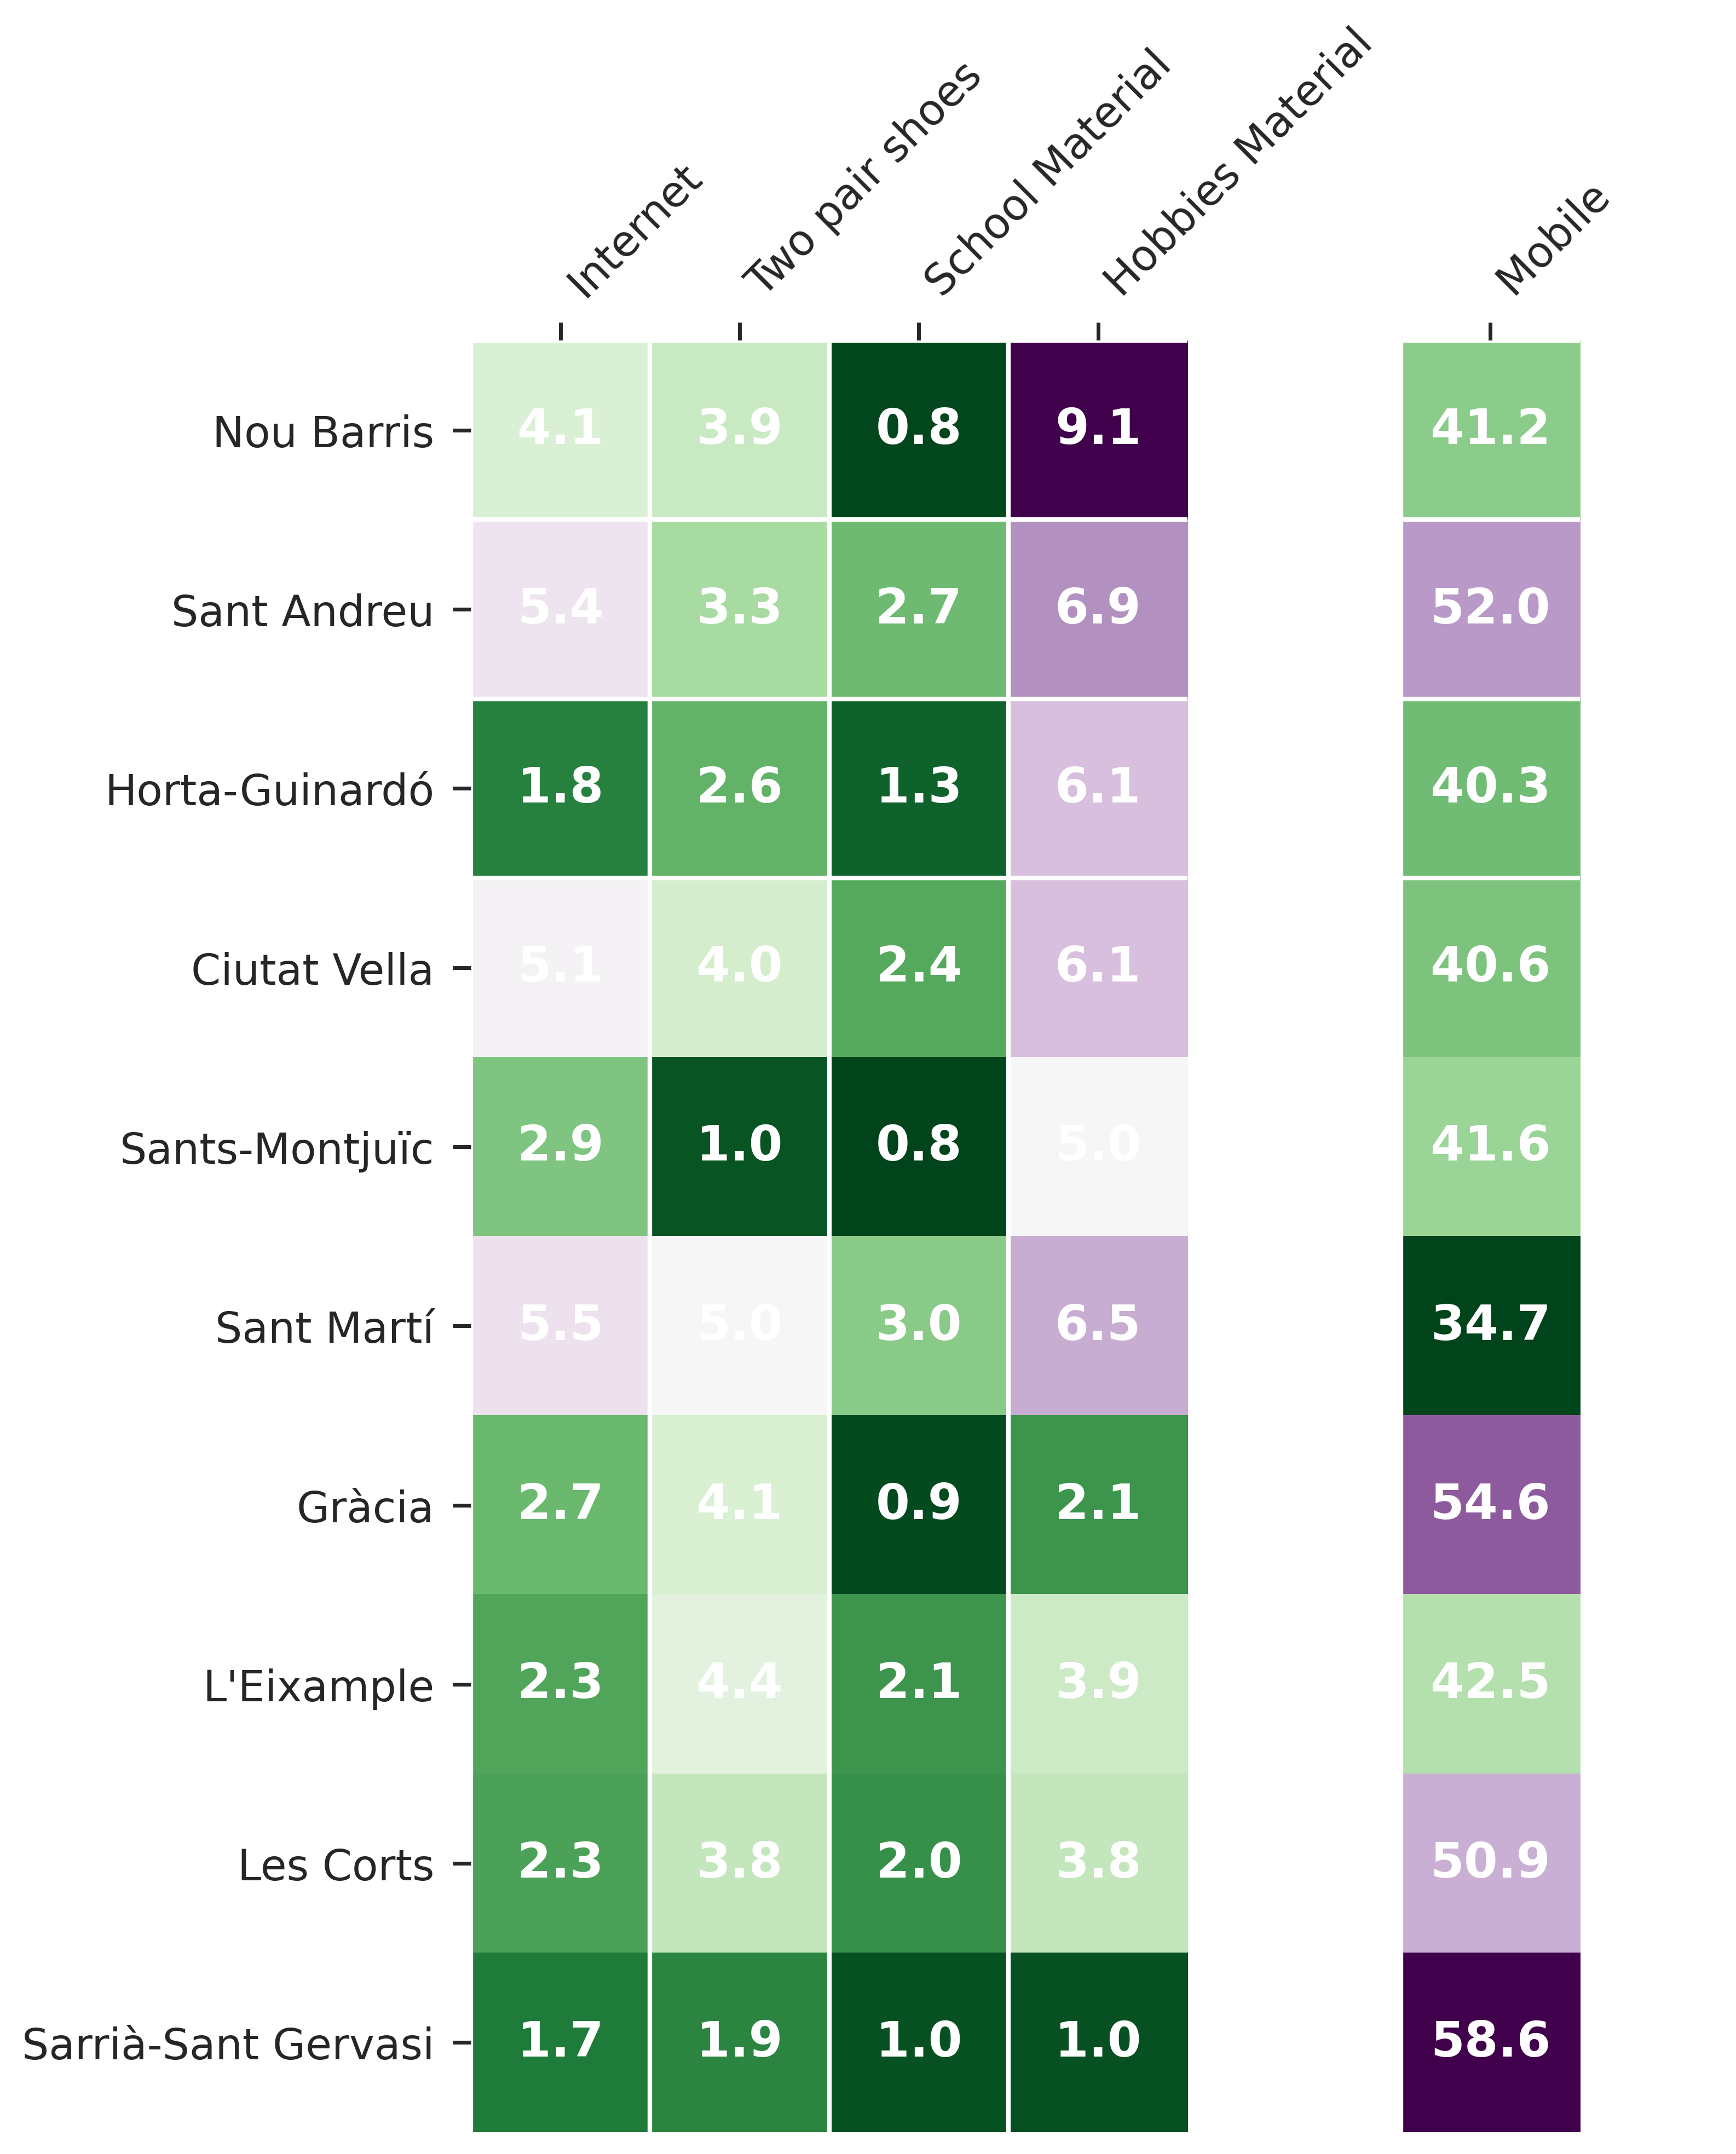

In [20]:
df_ = df_t.copy()
att_name = 'Nom_Districte_Educatiu'
levels = ['bm_internet', 'bm_sabates', 'bm_mescola', 'bm_maficions']
lev_new= ['Internet', 'Two pair shoes', 'School Material', 'Hobbies Material']
# 
m, att = am_dataprep(df_, att_name, levels)

levels2 = ['bm_mobil']
sec_lev= ['Mobile          ']

sec_mtrx, att = am_dataprep(df_, att_name, levels2)
bat_plot2(m,lev_new, att, sec_mtrx, sec_lev, fig_tup=(8,10), cmap='PRGn_r')

In [13]:
att_name = 'Nom_Districte_Educatiu'
levels = ['familia_altra_casa']
lev_new= ['Family in another house']

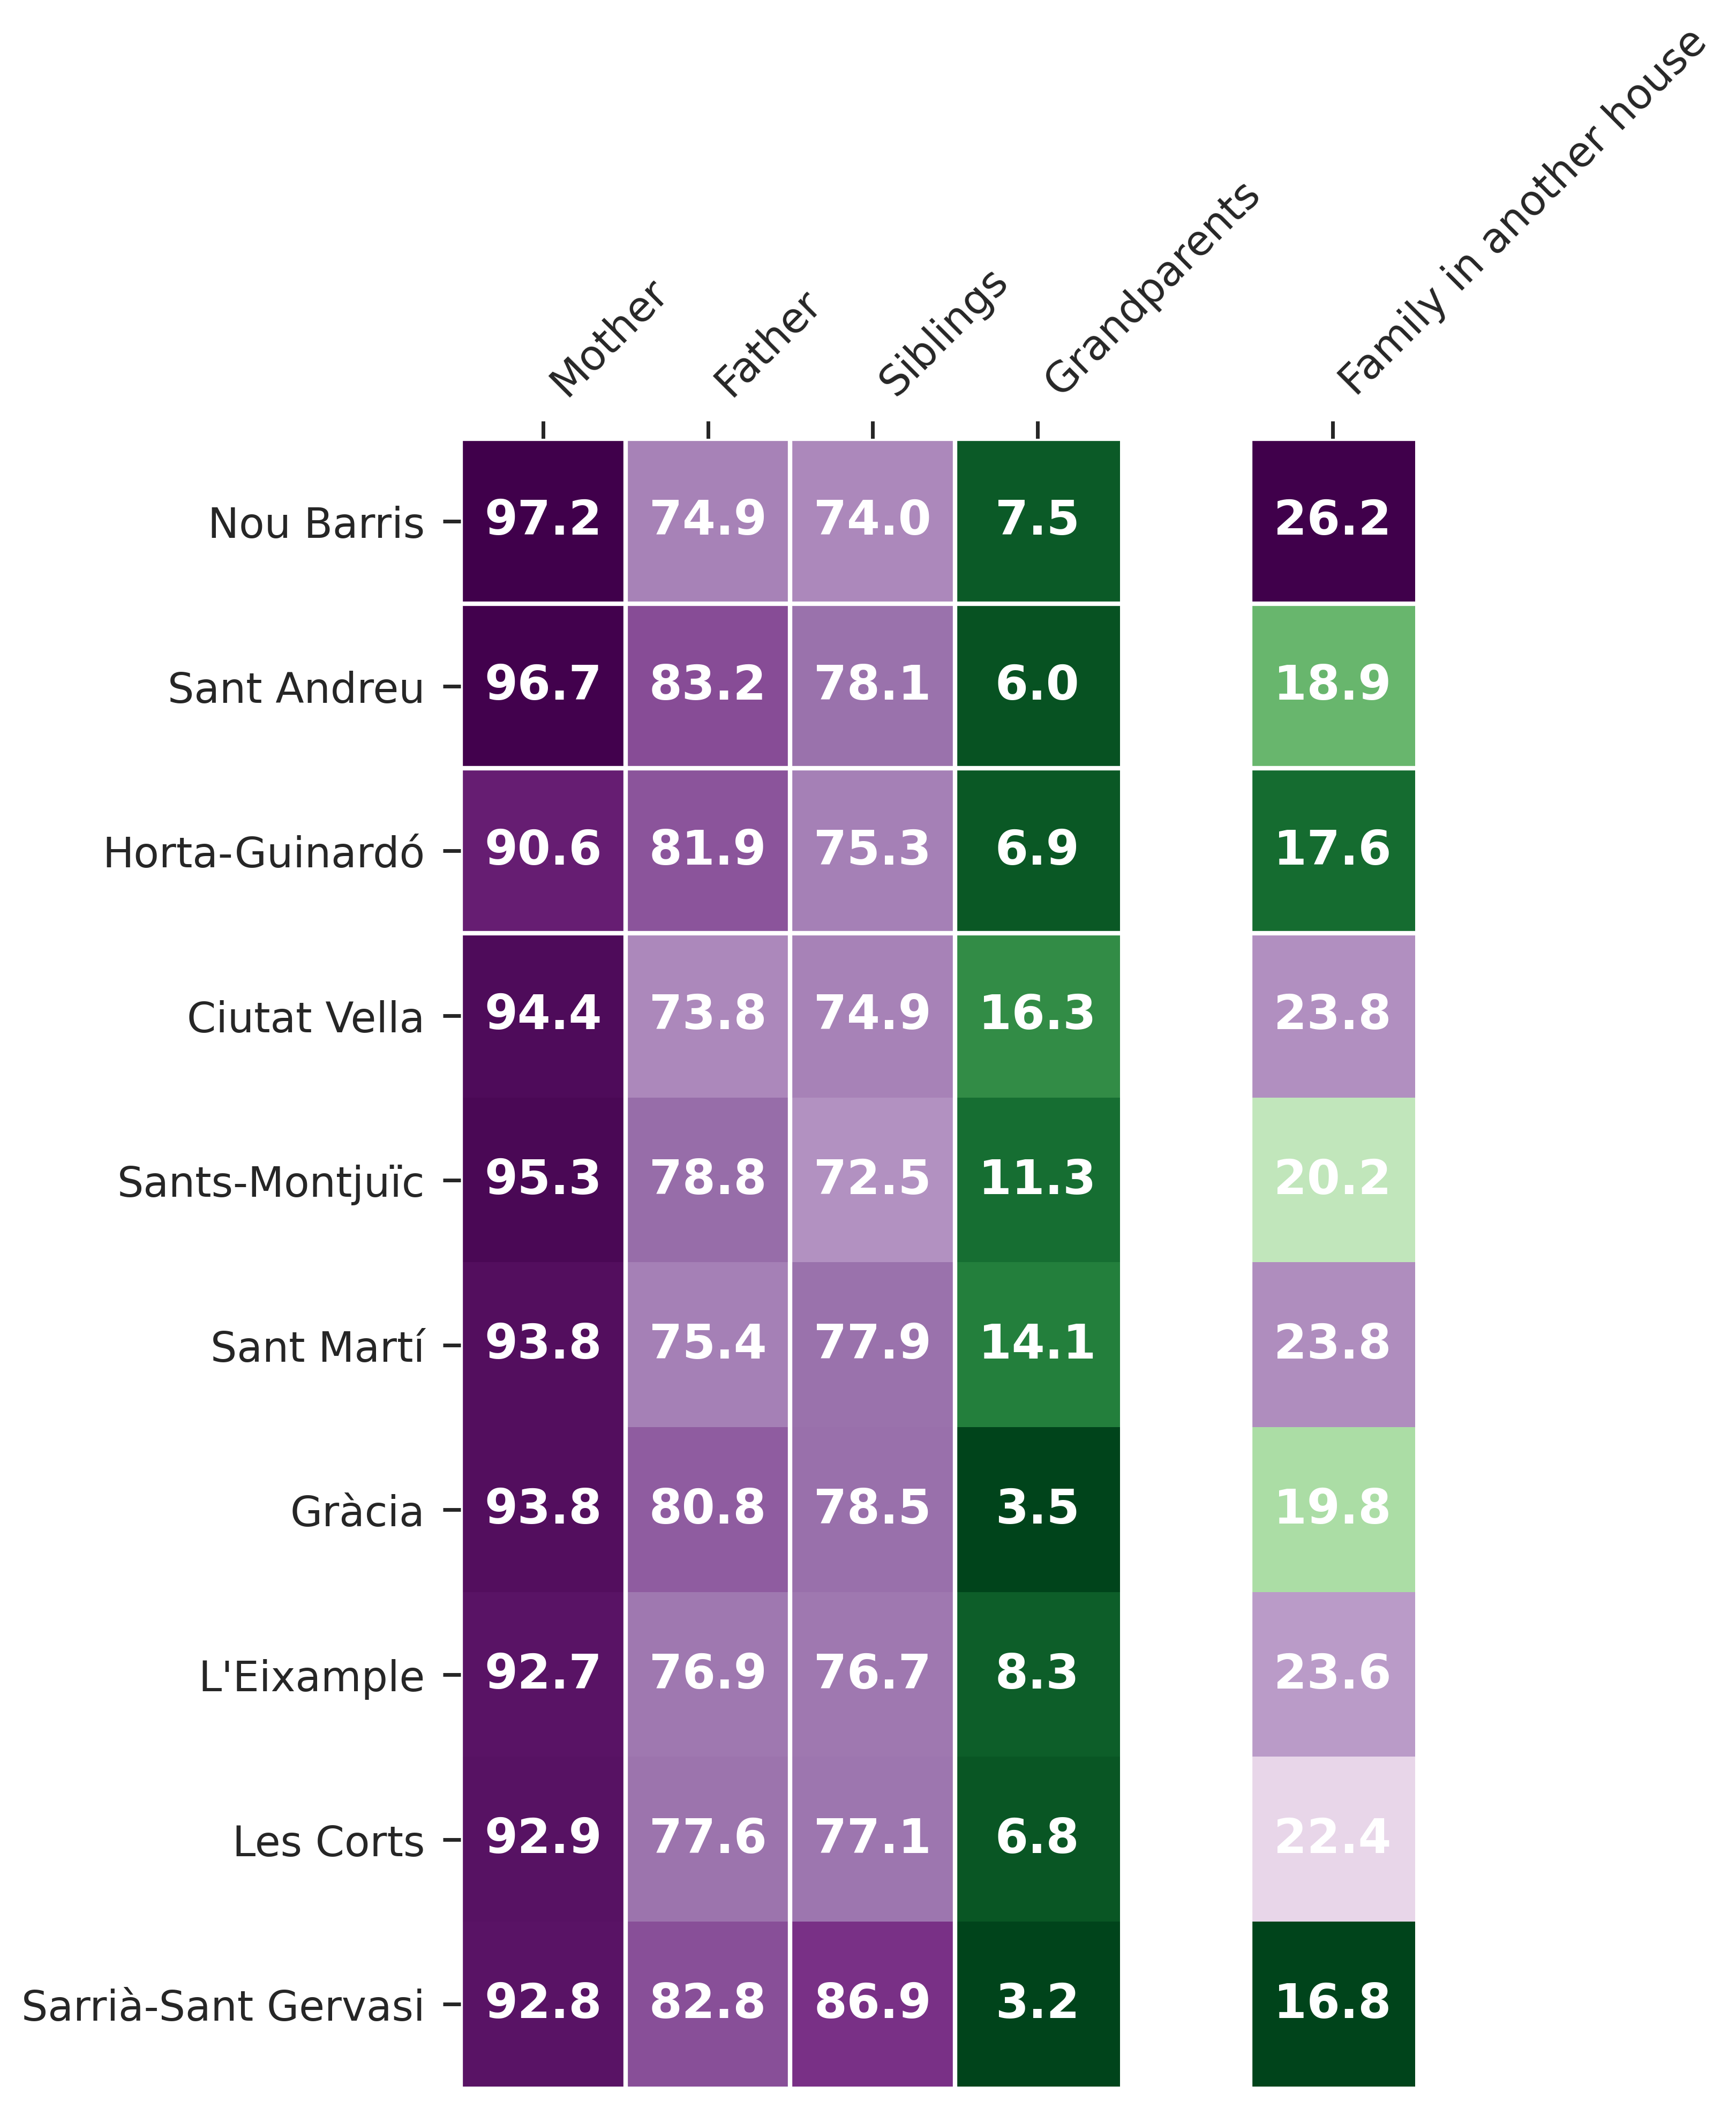

In [22]:
att_name = 'Nom_Districte_Educatiu'
levels = ['mare', 'pare', 'germans', 'avis']
lev_new= ['Mother', 'Father', 'Siblings', 'Grandparents']

m, att = am_dataprep(df_, att_name, levels, no=False)

levels2 = ['familia_altra_casa']
sec_lev= ['Family in another house']

sec_mtrx, att = am_dataprep(df_, att_name, levels2, no=False)
bat_plot2(m,lev_new, att, sec_mtrx, sec_lev, fig_tup=(8,10), cmap='PRGn_r')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>